In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import scipy
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error 

In [2]:
df = pd.read_csv('dataset_2190_cholesterol.csv')
df.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


In [3]:
df.describe()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,num,chol
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294,246.693069
std,9.038662,0.467299,0.960126,17.599748,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536,51.776918
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,126.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,211.000000
50%,56.000000,1.000000,3.000000,130.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,241.000000
75%,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,275.000000
max,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,564.000000


In [4]:
profile = pp.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
l = df.columns.tolist()
l

['age',
 'sex',
 'cp',
 'trestbps',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num',
 'chol']

In [6]:
for i in l:
    print(i, df[i].unique())

age [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]
sex [1 0]
cp [1 4 3 2]
trestbps [145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]
fbs [1 0]
restecg [2 0 1]
thalach [150 108 129 187 172 178 160 163 147 155 148 153 142 173 162 174 168 139
 171 144 132 158 114 151 161 179 120 112 137 157 169 165 123 128 152 140
 188 109 125 131 170 113  99 177 141 180 111 143 182 156 115 149 145 146
 175 186 185 159 130 190 136  97 127 154 133 126 202 103 166 164 184 124
 122  96 138  88 105 194 195 106 167  95 192 117 121 116  71 118 181 134
  90]
exang [0 1]
oldpeak [2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 3.1 0.4 1.3 0.  0.5 1.6 1.  1.2 0.2 1.8
 3.2 2.4 2.  2.5 2.2 2.8 3.  3.4 6.2 4.  5.6 2.9 0.1 2.1 1.9 4.2 0.9 1.1
 3.8 0.7 0.3 4.4]
slope [3 2 1]
ca ['0' '3' '2' '1' '?']
thal [

In [7]:
df = df[df.ca != '?']
df = df[df.thal != '?']

In [8]:
df['ca'] = df['ca'].astype(int)
df['thal'] = df['thal'].astype(int)

In [9]:
df

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,0,0,123,1,0.2,2,0,7,1,241
298,45,1,1,110,0,0,132,0,1.2,2,0,7,1,264
299,68,1,4,144,1,0,141,0,3.4,2,2,7,2,193
300,57,1,4,130,0,0,115,1,1.2,2,1,7,3,131


In [10]:
df.corr()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
age,1.000000,-0.092399,0.110471,0.290476,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.222156,0.202644
sex,-0.092399,1.000000,0.008908,-0.066340,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.226797,-0.198089
cp,0.110471,0.008908,1.000000,-0.036980,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.404248,0.072088
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.159620,0.131536
fbs,0.132062,0.038850,-0.057663,0.180860,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.049040,0.012708
restecg,0.149917,0.033897,0.063905,0.149242,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.184136,0.165046
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.420639,-0.000075
exang,0.096489,0.143581,0.377525,0.066691,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.391613,0.059339
oldpeak,0.197123,0.106567,0.203244,0.191243,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.501461,0.038596
slope,0.159405,0.033345,0.151079,0.121172,0.047819,0.135141,-0.389307,0.250572,0.579037,1.000000,0.109761,0.279688,0.374689,-0.009215


#### features look independent

In [11]:
for i in ['age',
 'sex',
 'cp',
 'trestbps',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'num',
 'chol']:
    Q1 = np.percentile(df[i], 25)
    Q3 = np.percentile(df[i], 75)
    IQR = scipy.stats.iqr(df[i])
    upper = df[df[i] > (Q3 + 1.5*IQR)].shape[0]
    lower = df[df[i] < (Q1 - 1.5*IQR)].shape[0]
    print("Number of outliers of feature", i, ":", upper+lower)
    

Number of outliers of feature age : 0
Number of outliers of feature sex : 0
Number of outliers of feature cp : 23
Number of outliers of feature trestbps : 9
Number of outliers of feature fbs : 43
Number of outliers of feature restecg : 0
Number of outliers of feature thalach : 1
Number of outliers of feature exang : 0
Number of outliers of feature oldpeak : 5
Number of outliers of feature slope : 0
Number of outliers of feature num : 0
Number of outliers of feature chol : 5


#### use Robust Scaler since the small size of the data. do not remove outliers

In [12]:
X = df[l[:-1]]
y = df[l[-1]]

### 1. Linear

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 42)

Residual plot for chol and age


c:\program files\python36\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


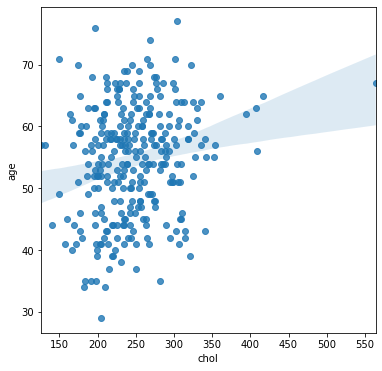

Residual plot for chol and sex


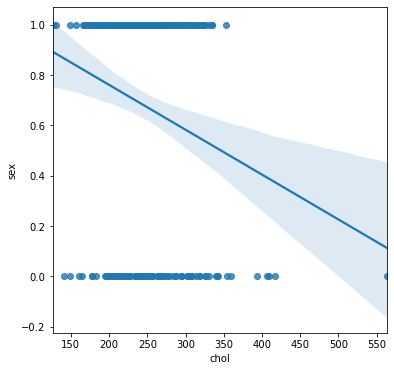

Residual plot for chol and cp


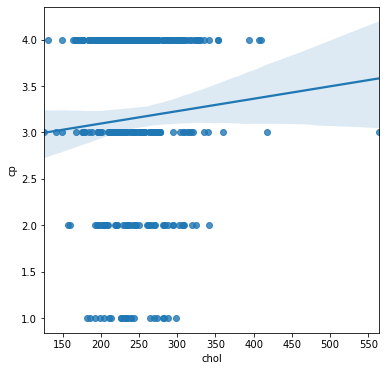

Residual plot for chol and trestbps


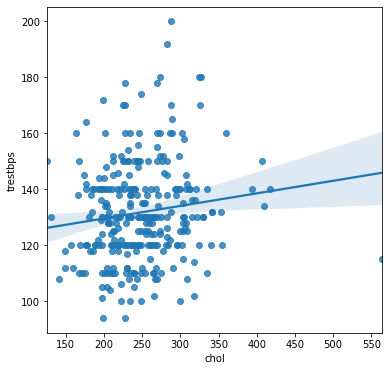

Residual plot for chol and fbs


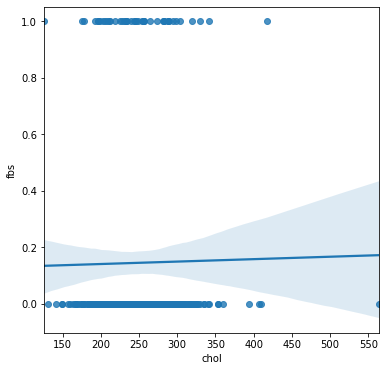

Residual plot for chol and restecg


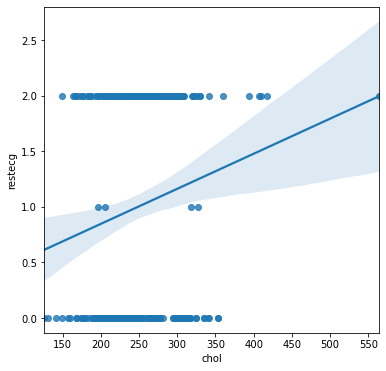

Residual plot for chol and thalach


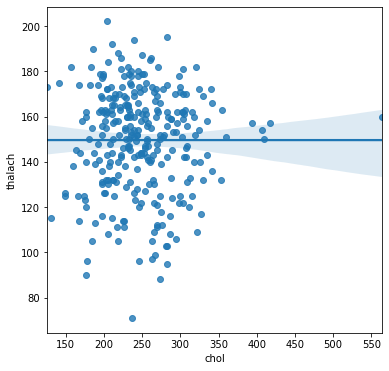

Residual plot for chol and exang


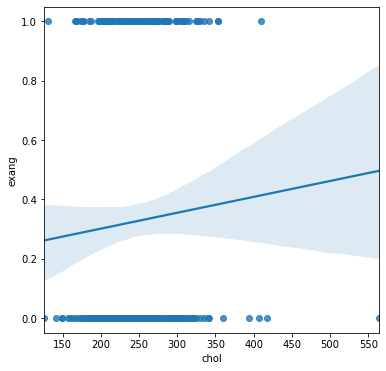

Residual plot for chol and oldpeak


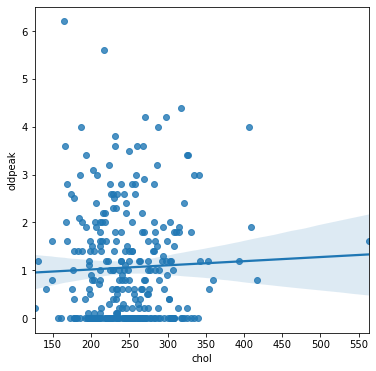

Residual plot for chol and slope


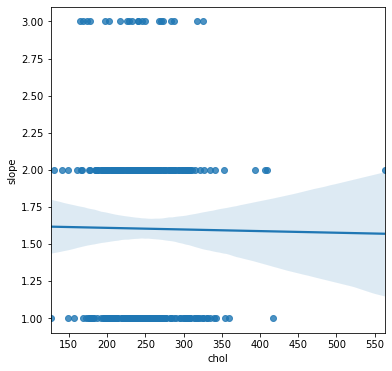

Residual plot for chol and ca


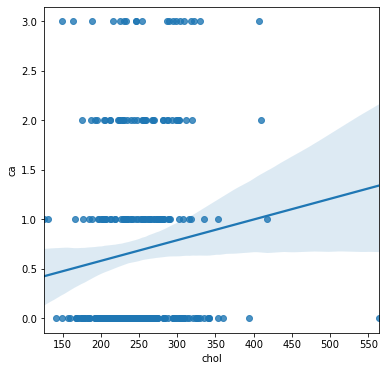

Residual plot for chol and thal


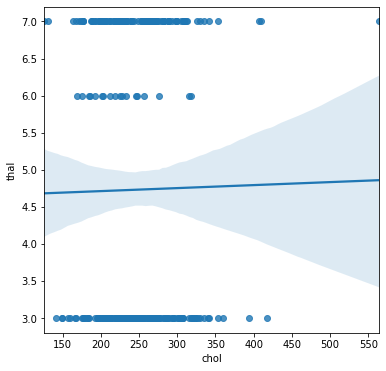

Residual plot for chol and num


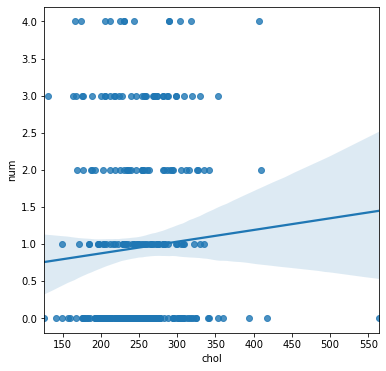

In [15]:
for i in l[:-1]:
    print("Residual plot for chol and", i)
    
    plt.figure(figsize=(6,6))
    sns.regplot(y =i , x = 'chol', data = df)
    plt.show()

#### Model single-variable linear regression does not fit

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
modellinear1 = LinearRegression()
modellinear1.fit(X_train, y_train)
ytrainlinear1 = modellinear1.predict(X_train)
ytestlinear1 = modellinear1.predict(X_test)

In [18]:
mean_squared_error(y_train, ytrainlinear1)

2344.513881253456

In [19]:
mean_squared_error(y_test, ytestlinear1)

2704.5630195065446

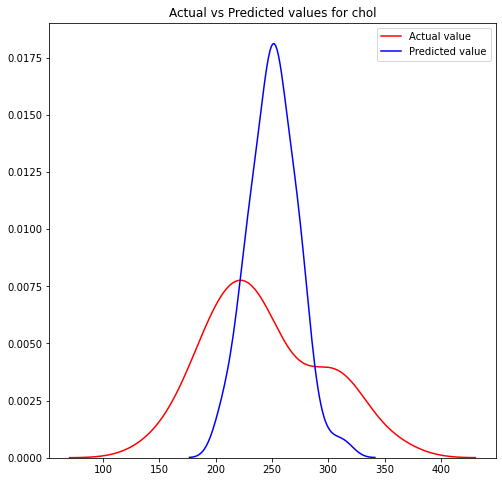

In [20]:
plt.figure(figsize=(8,8))
ax1 = sns.kdeplot(y_test, color='r', label='Actual value')
sns.kdeplot(ytestlinear1, color='b', label='Predicted value', ax = ax1)
plt.title('Actual vs Predicted values for chol')
plt.show()

#### does not fit

### 2. KNN

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [22]:
for k in range(2,9):
    modelknn1 = KNeighborsClassifier(n_neighbors = k)
    modelknn1.fit(X_train, y_train)
    ytrainknn1 = modelknn1.predict(X_train)
    ytestknn1 = modelknn1.predict(X_test)
    print("MSE for Train data is", mean_squared_error(y_train, ytrainknn1), "for K-value =", k)
    print("MSE for Test data is", mean_squared_error(y_test, ytestknn1), "for K-value =", k)

MSE for Train data is 2368.721518987342 for K-value = 2
MSE for Test data is 3649.8166666666666 for K-value = 2
MSE for Train data is 3752.2742616033756 for K-value = 3
MSE for Test data is 4736.483333333334 for K-value = 3
MSE for Train data is 5000.050632911392 for K-value = 4
MSE for Test data is 5032.45 for K-value = 4
MSE for Train data is 5328.662447257384 for K-value = 5
MSE for Test data is 5262.2 for K-value = 5
MSE for Train data is 5521.362869198312 for K-value = 6
MSE for Test data is 5300.033333333334 for K-value = 6
MSE for Train data is 5863.565400843881 for K-value = 7
MSE for Test data is 5794.433333333333 for K-value = 7
MSE for Train data is 5909.113924050633 for K-value = 8
MSE for Test data is 5067.266666666666 for K-value = 8


#### => choose k=2

In [23]:
modelknn1 = KNeighborsClassifier(n_neighbors = 2)
modelknn1.fit(X_train, y_train)
ytrainknn1 = modelknn1.predict(X_train)
ytestknn1 = modelknn1.predict(X_test)

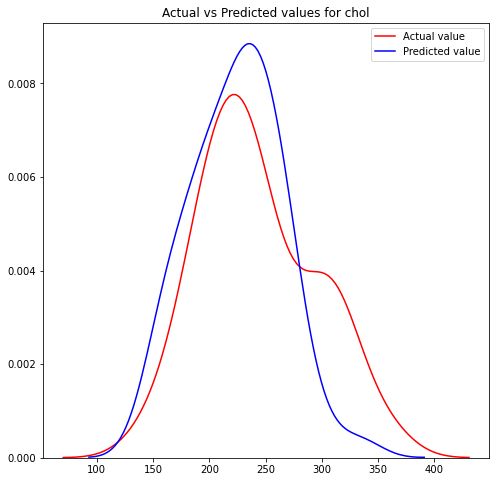

In [24]:
plt.figure(figsize=(8,8))
ax1 = sns.kdeplot(y_test, color='r', label='Actual value')
sns.kdeplot(ytestknn1, color='b', label='Predicted value', ax = ax1)
plt.title('Actual vs Predicted values for chol')
plt.show()

####  MSE lower than linear regression's before scaling

### 3. Decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [26]:
clf = DecisionTreeClassifier()
modeltree1 = clf.fit(X_train, y_train)
ytraintree1 = modeltree1.predict(X_train)
ytesttree1 = modeltree1.predict(X_test)

In [27]:
mean_squared_error(y_train, ytraintree1)

0.0

In [28]:
mean_squared_error(y_test, ytesttree1)

5667.55

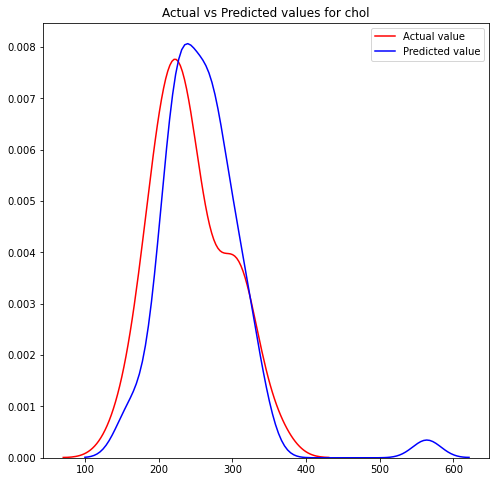

In [29]:
plt.figure(figsize=(8,8))
ax1 = sns.kdeplot(y_test, color='r', label='Actual value')
sns.kdeplot(ytesttree1, color='b', label='Predicted value', ax = ax1)
plt.title('Actual vs Predicted values for chol')
plt.show()

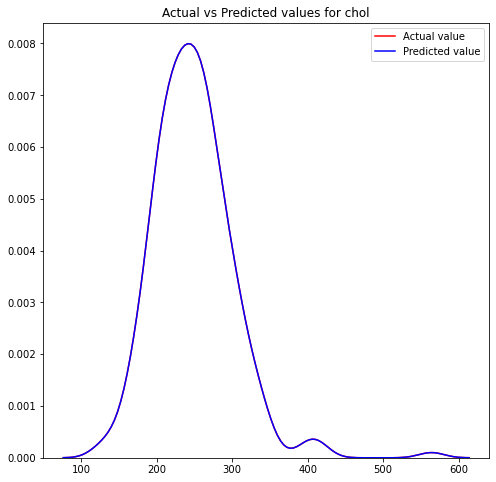

In [30]:
plt.figure(figsize=(8,8))
ax1 = sns.kdeplot(y_train, color='r', label='Actual value')
sns.kdeplot(ytraintree1, color='b', label='Predicted value', ax = ax1)
plt.title('Actual vs Predicted values for chol')
plt.show()

####  overfitting => use random forest

### 4. Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rrf = RandomForestRegressor(n_estimators=100)
modelforest1 = rrf.fit(X_train, y_train)
ytrainforest1 = modelforest1.predict(X_train)
ytestforest1 = modelforest1.predict(X_test)

In [33]:
mean_squared_error(y_train, ytrainforest1)

404.9275151898735

In [34]:
mean_squared_error(y_test, ytestforest1)

2624.9062299999996

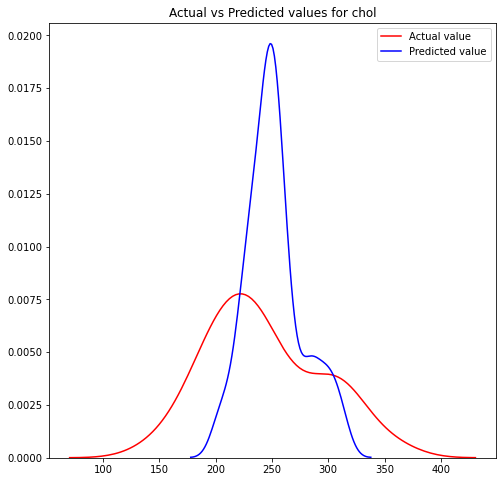

In [35]:
plt.figure(figsize=(8,8))
ax1 = sns.kdeplot(y_test, color='r', label='Actual value')
sns.kdeplot(ytestforest1, color='b', label='Predicted value', ax = ax1)
plt.title('Actual vs Predicted values for chol')
plt.show()

#### nice MSE

### create the models again after using Robust scaler

In [40]:
from sklearn.preprocessing import RobustScaler
X_traint = RobustScaler().fit(X_train)
X_testt = RobustScaler().fit(X_test)

In [41]:
X_trainnew = X_traint.transform(X_train)
X_testnew = X_testt.transform(X_test)

### 1'. Linear 

In [43]:
modellinear2 = LinearRegression()
modellinear2.fit(X_trainnew, y_train)
ytrainlinear2 = modellinear2.predict(X_trainnew)
ytestlinear2 = modellinear2.predict(X_testnew)

In [44]:
mean_squared_error(y_train, ytrainlinear2)

2344.5138812534565

In [45]:
mean_squared_error(y_test, ytestlinear2)

3064.7881431192814

#### => MSE increase

### 2'. KNN

In [46]:
for k in range(2,9):
    modelknn2 = KNeighborsClassifier(n_neighbors = k)
    modelknn2.fit(X_trainnew, y_train)
    ytrainknn2 = modelknn2.predict(X_trainnew)
    ytestknn2 = modelknn2.predict(X_testnew)
    print("MSE for Train data is", mean_squared_error(y_train, ytrainknn2), "for K-value =", k)
    print("MSE for Test data is", mean_squared_error(y_test, ytestknn2), "for K-value =", k)

MSE for Train data is 2423.6835443037976 for K-value = 2
MSE for Test data is 3164.616666666667 for K-value = 2
MSE for Train data is 3975.42194092827 for K-value = 3
MSE for Test data is 3882.866666666667 for K-value = 3
MSE for Train data is 4774.856540084388 for K-value = 4
MSE for Test data is 4597.033333333334 for K-value = 4
MSE for Train data is 5414.835443037975 for K-value = 5
MSE for Test data is 5093.233333333334 for K-value = 5
MSE for Train data is 6107.400843881856 for K-value = 6
MSE for Test data is 5406.333333333333 for K-value = 6
MSE for Train data is 6497.31223628692 for K-value = 7
MSE for Test data is 5315.6 for K-value = 7
MSE for Train data is 6628.974683544304 for K-value = 8
MSE for Test data is 5402.733333333334 for K-value = 8


#### MSE decrease after scaling, although the result is still bad

### 3'. Decision Tree

In [47]:
modeltree2 = clf.fit(X_trainnew, y_train)
ytraintree2 = modeltree2.predict(X_trainnew)
ytesttree2 = modeltree2.predict(X_testnew)

In [48]:
mean_squared_error(y_train, ytraintree2)

0.0

In [49]:
mean_squared_error(y_test, ytesttree2)

5567.4

#### =>overfitting

### 4'. Random Forest

In [50]:
modelforest2 = rrf.fit(X_trainnew, y_train)
ytrainforest2 = modelforest2.predict(X_trainnew)
ytestforest2 = modelforest2.predict(X_testnew)

In [51]:
mean_squared_error(y_train, ytrainforest2)

421.1985873417722

In [52]:
mean_squared_error(y_test, ytestforest2)

2589.085176666667

#### model does not become better when scaling

### use Random Forest before scaling

#### https://medlineplus.gov/cholesterollevelswhatyouneedtoknow.html

In [53]:
df['healthy'] = np.where(df['chol']< 200, 1, 0)

In [54]:
df

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol,healthy
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,0
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,0
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,0
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,0
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,0,0,123,1,0.2,2,0,7,1,241,0
298,45,1,1,110,0,0,132,0,1.2,2,0,7,1,264,0
299,68,1,4,144,1,0,141,0,3.4,2,2,7,2,193,1
300,57,1,4,130,0,0,115,1,1.2,2,1,7,3,131,1


In [55]:
ypred = modelforest1.predict(X)

In [56]:
yhealthy = np.where(ypred< 200, 1, 0)

In [57]:
accuracy_score(df['healthy'], yhealthy)

0.8383838383838383

#### model looks ok